In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import colorama
Main_Dataset = pd.read_csv('heart.csv')
Main_Dataset = pd.DataFrame(Main_Dataset)
print(Main_Dataset.shape)
Main_Dataset.head(10).style.set_properties(**{'background-color': '#F6E7E8',
                           'color': 'black',
                           'border-color': 'black'})



(303, 14)


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.300000,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.500000,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.400000,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.800000,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.600000,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.400000,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.300000,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.000000,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.500000,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.600000,2,0,2,1


In [8]:
def describe(Main_Dataset):
    
    
    variables = []
    dtypes = []
    count = []
    unique = []
    missing = []
    min_ = []
    max_ = []
    
    
    for item in Main_Dataset.columns:
        variables.append(item)
        dtypes.append(Main_Dataset[item].dtype)
        count.append(len(Main_Dataset[item]))
        unique.append(len(Main_Dataset[item].unique()))
        missing.append(Main_Dataset[item].isna().sum())
        
        if Main_Dataset[item].dtypes == 'float64' or Main_Dataset[item].dtypes == 'int64':
            min_.append(Main_Dataset[item].min())
            max_.append(Main_Dataset[item].max())
        else:
            min_.append('Str')
            max_.append('Str')
        

    output = pd.DataFrame({
        'variable': variables, 
        'dtype': dtypes,
        'count': count,
        'unique': unique,
        'missing value': missing,
        'Min': min_,
        'Max': max_
    })    
        
    return output

In [15]:
Styles = [dict(selector = "caption",
               props = [("color", "white"), 
                        ("text-align", "center"),
                       ('font-size', '15pt'),
                       ('background-color', 'blue')])]
desc_df = describe(Main_Dataset)
desc_df = desc_df.style.set_caption('pregled').set_table_styles(Styles)
desc_df.set_properties(**{'background-color': 'white',
                           'color': 'black',
                           'border-color': 'black'})

,variable,dtype,count,unique,missing value,Min,Max
0,age,int64,303,41,0,29.000000,77.000000
1,sex,int64,303,2,0,0.000000,1.000000
2,cp,int64,303,4,0,0.000000,3.000000
3,trtbps,int64,303,49,0,94.000000,200.000000
4,chol,int64,303,152,0,126.000000,564.000000
5,fbs,int64,303,2,0,0.000000,1.000000
6,restecg,int64,303,3,0,0.000000,2.000000
7,thalachh,int64,303,91,0,71.000000,202.000000
8,exng,int64,303,2,0,0.000000,1.000000
9,oldpeak,float64,303,40,0,0.000000,6.200000


age - godine
trtbps - krvni pritisak
chol - holesterol
thalachh- maksimalni odkucaji srca
oldpeak-
prikazivanje podataka dijagramski

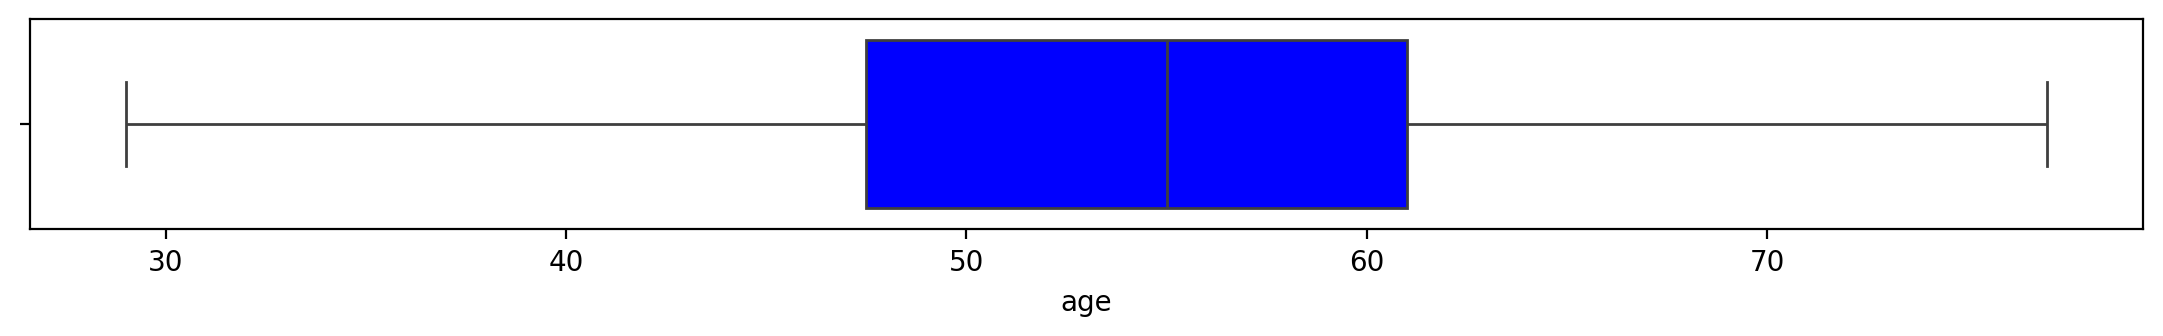

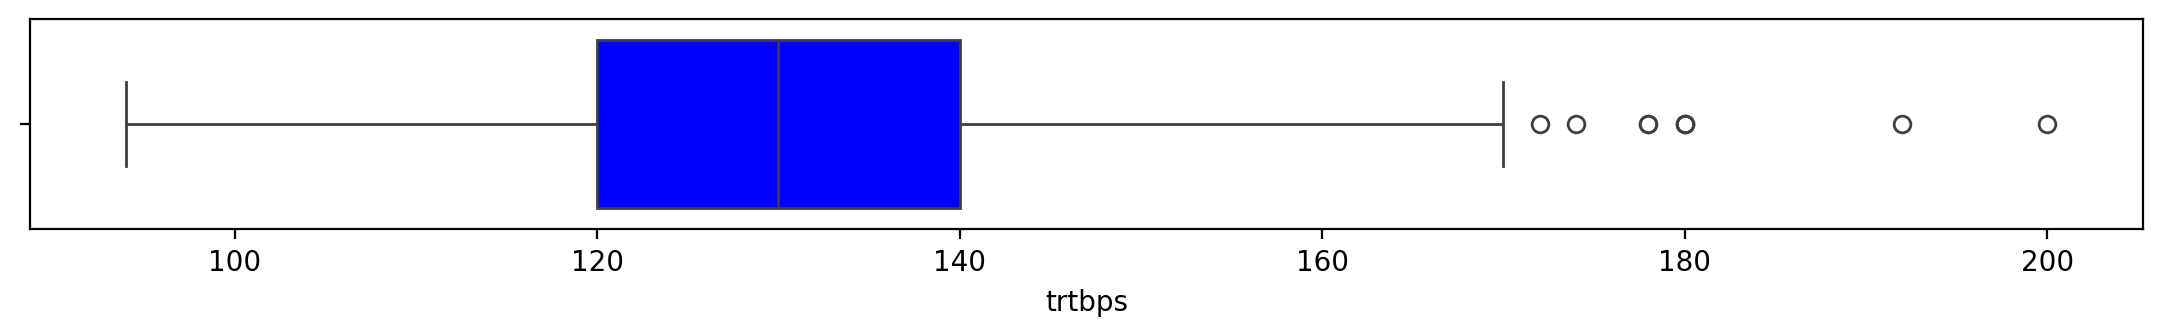

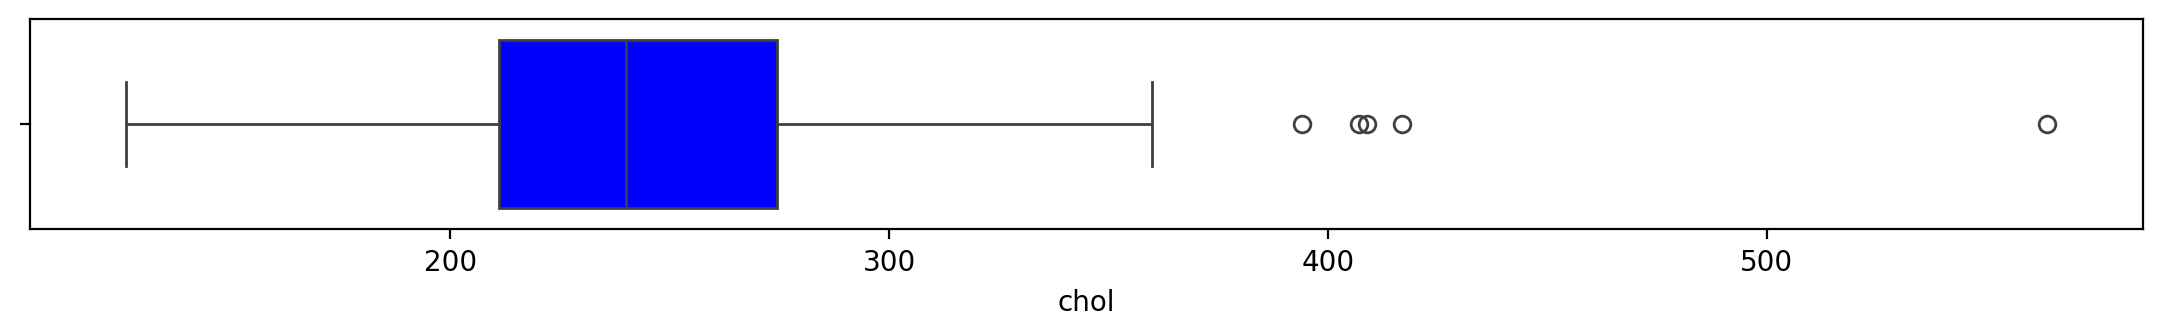

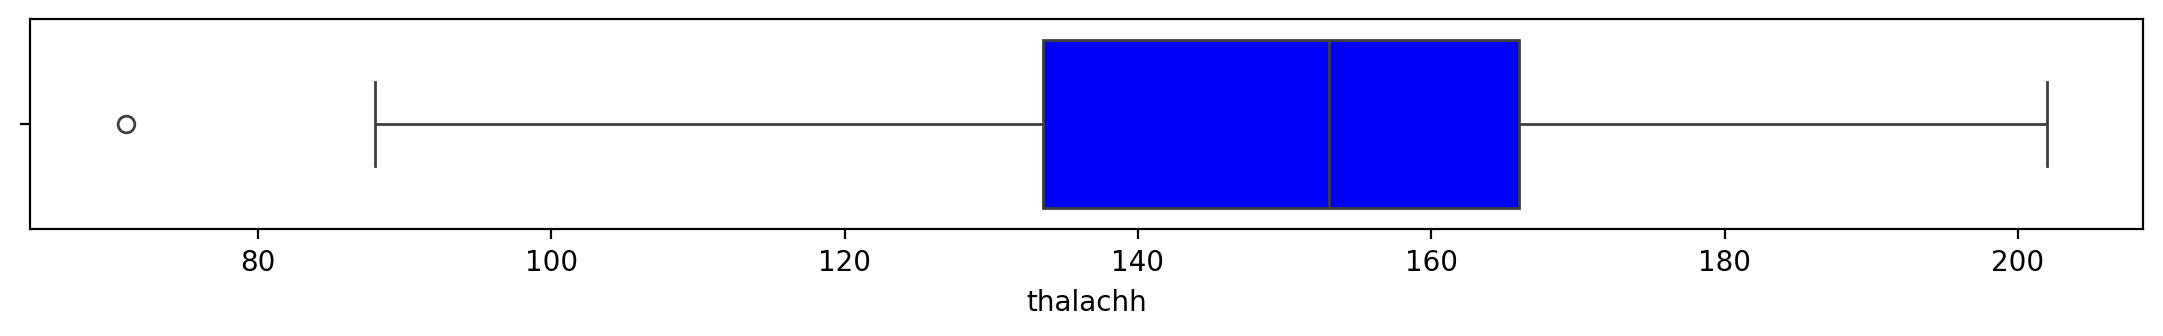

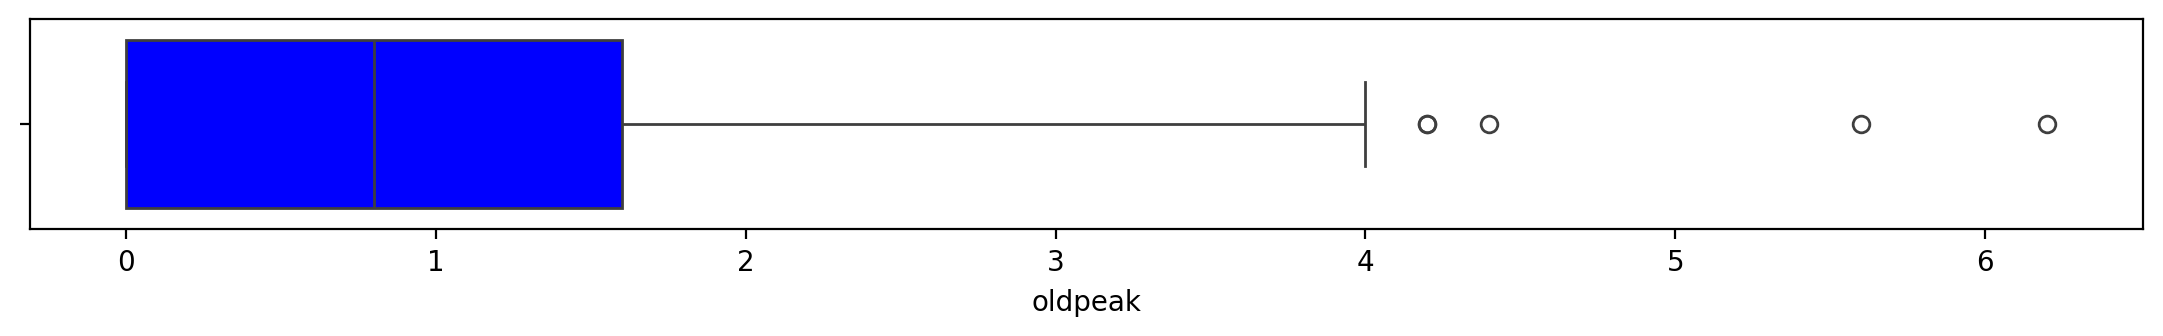

In [11]:
Numerical = ['age', 'trtbps','chol','thalachh','oldpeak']
i = 0
while i < 5:
    fig = plt.figure(figsize = [30,3], dpi=200)
    plt.subplot(2,2,1)
    sns.boxplot(x = Numerical[i], data = Main_Dataset,
           boxprops = dict(facecolor = "blue"))
    i += 1
    plt.show()

brisanje noisy data

In [16]:
Chol_noise = Main_Dataset[Main_Dataset["chol"]>500].index
Chol_noise

Index([85], dtype='int64')

In [17]:
Main_Dataset.drop(index=[85], inplace=True)
Main_Dataset.shape

(302, 14)

prikazano bez noisy data

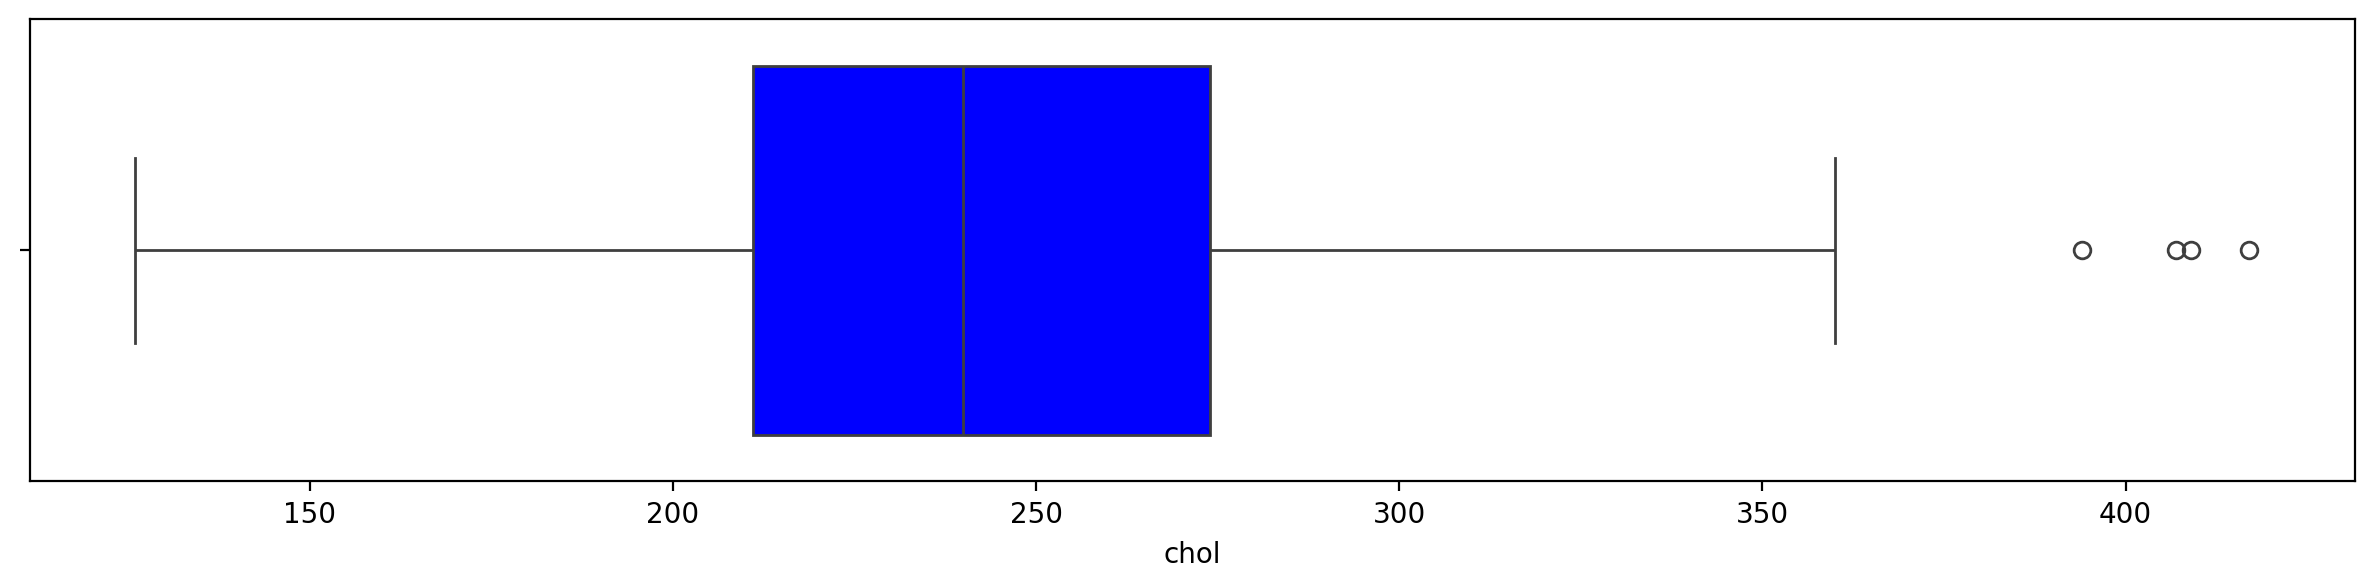

In [19]:
fig = plt.figure(figsize = [15,3], dpi=200)
sns.boxplot(x = 'chol', data = Main_Dataset,
        boxprops = dict(facecolor = "blue"))
    
plt.show()

brisanje noisy data u krvnom pritisku

In [22]:
Chol_noise = Main_Dataset[Main_Dataset["trtbps"]>190].index
Chol_noise

Index([223, 248], dtype='int64')

In [23]:
Main_Dataset.drop(index=[223], inplace=True)
Main_Dataset.shape
Main_Dataset.drop(index=[248], inplace=True)
Main_Dataset.shape

(300, 14)

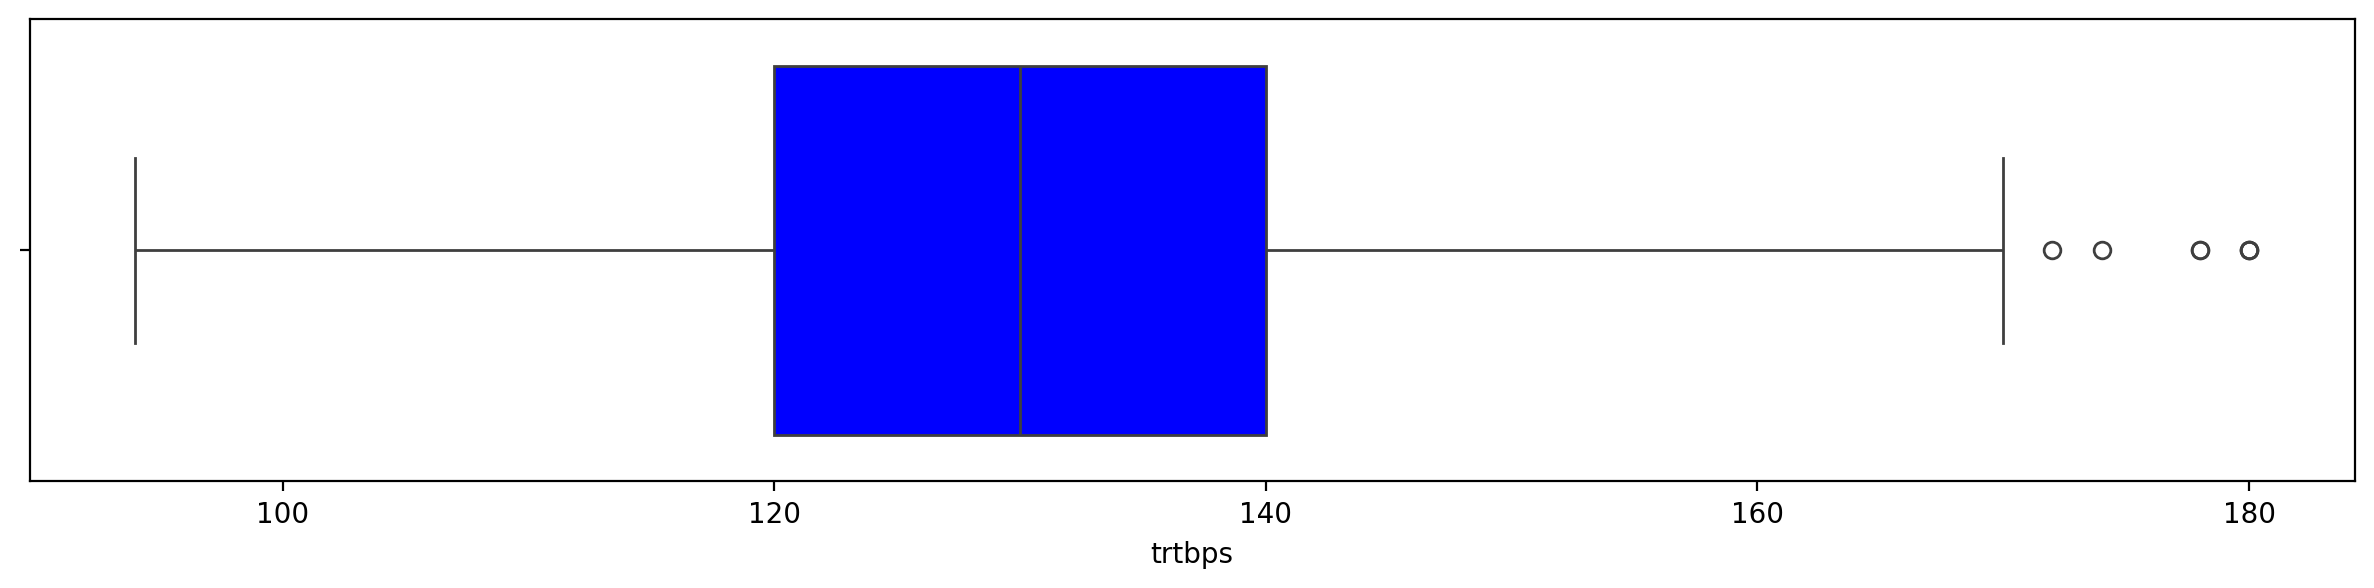

In [24]:
fig = plt.figure(figsize = [15,3], dpi=200)
sns.boxplot(x = 'trtbps', data = Main_Dataset,
        boxprops = dict(facecolor = "blue"))
    
plt.show()

podelicemo u dve tabele sa ljudima koji su imali srcane bolesti i oni koji nisu imali pomocu kolone output

In [26]:
bezbolesti_data = Main_Dataset[Main_Dataset["output"]==0]
bezbolesti_data = pd.DataFrame(bezbolesti_data)
sabolestima_data = Main_Dataset[Main_Dataset["output"]==1]
sabolestima_data = pd.DataFrame(sabolestima_data)
print(" Not disease",bezbolesti_data.shape)
print("Disease",sabolestima_data.shape)
bezbolesti_data.sort_values(by=['age'], inplace=True)
sabolestima_data.sort_values(by=['age'], inplace=True)

 Not disease (136, 14)
Disease (164, 14)


graficki prikaz holesterola po godinama gde imaju bolesti ibez njih

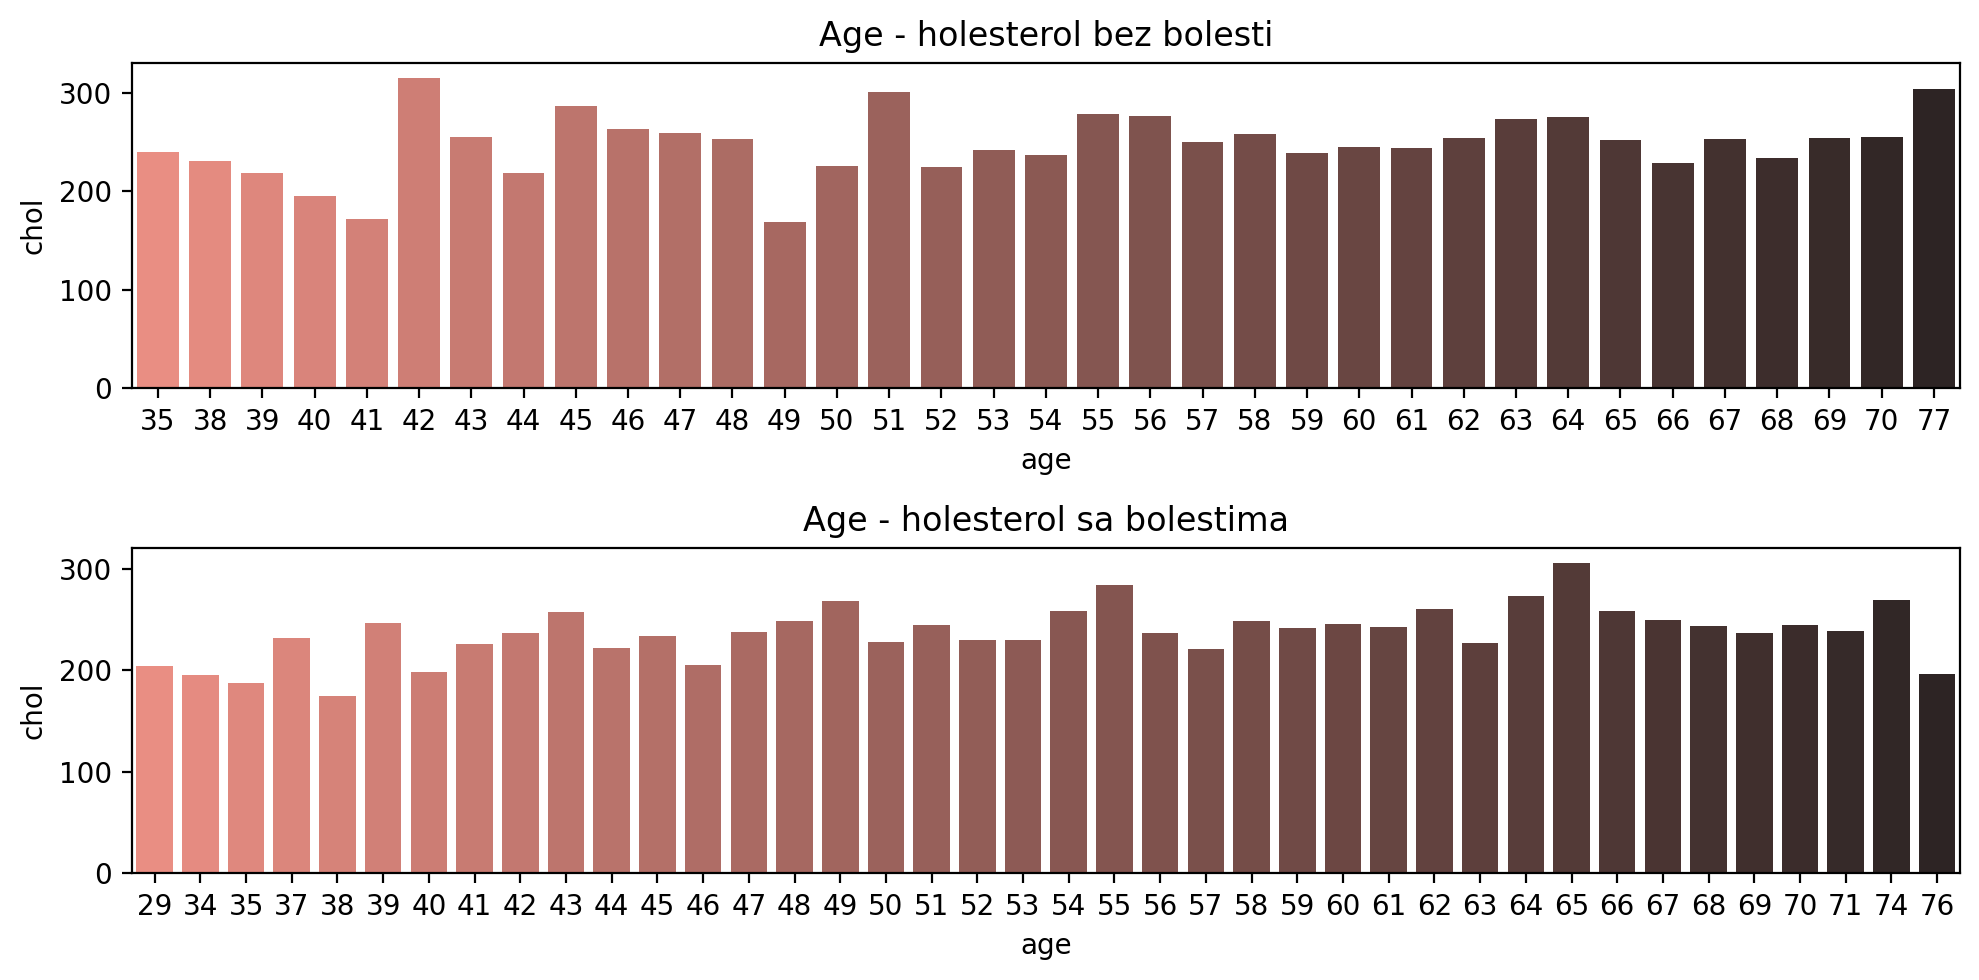

In [28]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 5), dpi=200)
sns.barplot(x= bezbolesti_data['age'], y= bezbolesti_data['chol'], errorbar=None,
            palette="dark:salmon_r",ax= axes[0]).set(title='Age - holesterol bez bolesti')
sns.barplot(x= sabolestima_data['age'], y= sabolestima_data['chol'], errorbar=None,
            palette="dark:salmon_r",ax= axes[1]).set(title='Age - holesterol sa bolestima')


plt.tight_layout()

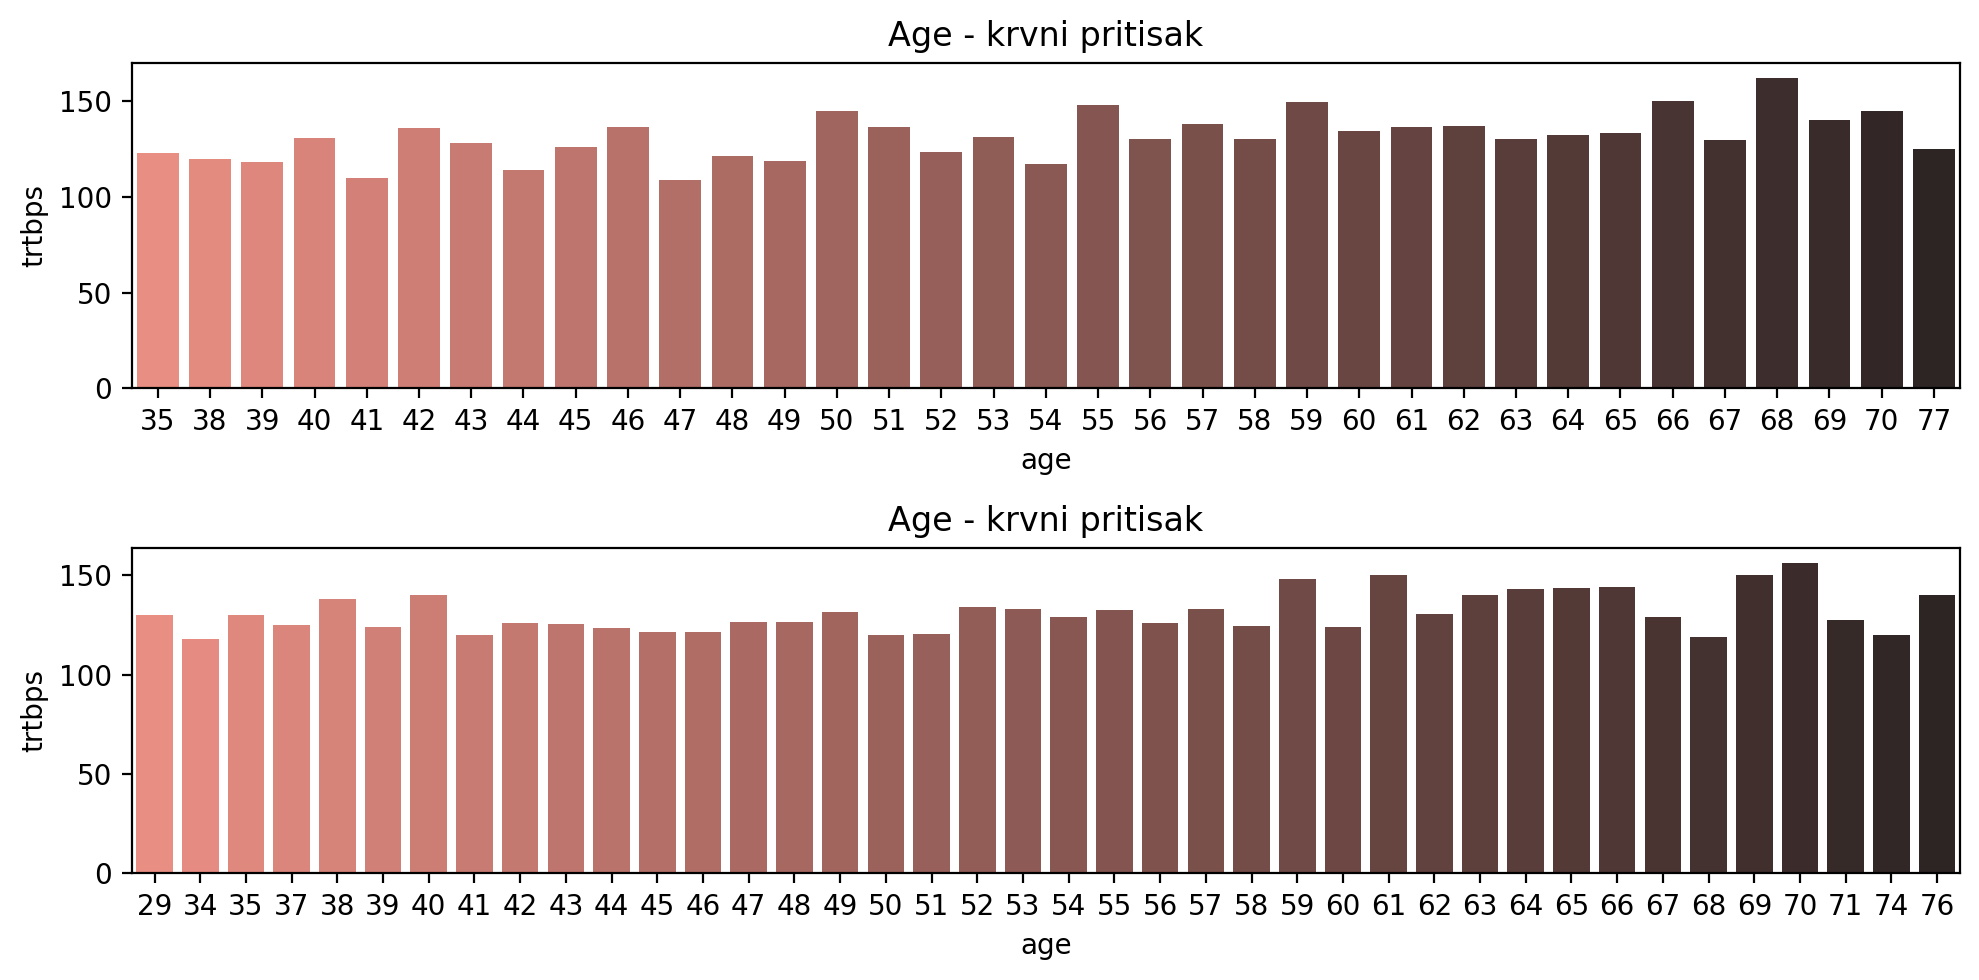

In [36]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 5), dpi=200)
sns.barplot(x= bezbolesti_data['age'], y= bezbolesti_data['trtbps'], errorbar=None,
            palette="dark:salmon_r",ax= axes[0]).set(title='Age - krvni pritisak')
sns.barplot(x= sabolestima_data['age'], y= sabolestima_data['trtbps'], errorbar=None,
            palette="dark:salmon_r",ax= axes[1]).set(title='Age - krvni pritisak')

plt.tight_layout()

ko vise oboljeva muskarci ili zene

<Axes: xlabel='sex', ylabel='count'>

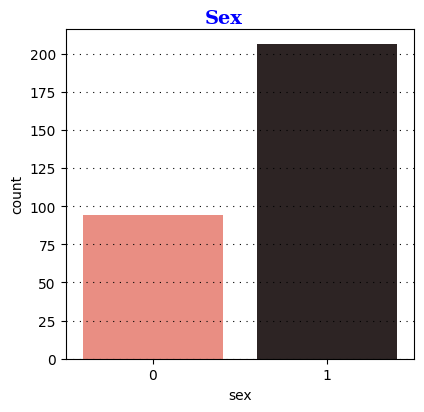

In [44]:
background_color = "white"
fig = plt.figure(figsize=(18,15))
gs = fig.add_gridspec(3,3)
gs.update(wspace=0.5, hspace=0.25)
ax1 = fig.add_subplot(gs[0,1])
ax1.set_facecolor(background_color) 
ax1.text(0.3, 220, 'Sex', fontsize=14, fontweight='bold', fontfamily='serif', color="blue")
ax1.grid(color='black', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1,data=Main_Dataset,x='sex',palette="dark:salmon_r")



sledi normalizacija uz pomocu scaler biblioteke

In [29]:
from sklearn.preprocessing import MinMaxScaler
Features = Main_Dataset.drop(columns='output')
Features = pd.DataFrame(Features)
scaler = MinMaxScaler()
Norm_data = scaler.fit_transform(Features)
Norm_df = pd.DataFrame(Norm_data, columns= Features.columns)
Norm_df.head(10).style.set_properties(**{'background-color': '#F6E7E8',
                           'color': 'black',
                           'border-color': 'black'})

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,0.708333,1.000000,1.000000,0.481132,0.244292,1.000000,0.000000,0.603053,0.000000,0.370968,0.000000,0.000000,0.333333
1,0.166667,1.000000,0.666667,0.339623,0.283105,0.000000,0.500000,0.885496,0.000000,0.564516,0.000000,0.000000,0.666667
2,0.250000,0.000000,0.333333,0.339623,0.178082,0.000000,0.000000,0.770992,0.000000,0.225806,1.000000,0.000000,0.666667
3,0.562500,1.000000,0.333333,0.245283,0.251142,0.000000,0.500000,0.816794,0.000000,0.129032,1.000000,0.000000,0.666667
4,0.583333,0.000000,0.000000,0.245283,0.520548,0.000000,0.500000,0.702290,1.000000,0.096774,1.000000,0.000000,0.666667
5,0.583333,1.000000,0.000000,0.433962,0.150685,0.000000,0.500000,0.587786,0.000000,0.064516,0.500000,0.000000,0.333333
6,0.562500,0.000000,0.333333,0.433962,0.383562,0.000000,0.000000,0.625954,0.000000,0.209677,0.500000,0.000000,0.666667
7,0.312500,1.000000,0.333333,0.245283,0.312785,0.000000,0.500000,0.778626,0.000000,0.000000,1.000000,0.000000,1.000000
8,0.479167,1.000000,0.666667,0.735849,0.166667,1.000000,0.500000,0.694656,0.000000,0.080645,1.000000,0.000000,1.000000
9,0.583333,1.000000,0.666667,0.528302,0.095890,0.000000,0.500000,0.786260,0.000000,0.258065,1.000000,0.000000,0.666667


sada prelazimo na drugi cas odnosno deskriptivna analiza podataka
############################################################################
############################################################################
############################################################################
############################################################################
############################################################################

In [2]:
Main_Dataset = pd.DataFrame(Main_Dataset)
print(Main_Dataset.shape)
Main_Dataset.head(10).style.set_properties(**{'background-color': '#F6E7E8',
                           'color': 'black',
                           'border-color': 'black'})

(303, 14)


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.300000,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.500000,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.400000,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.800000,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.600000,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.400000,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.300000,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.000000,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.500000,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.600000,2,0,2,1


izracunavanje proseka age kolone

In [3]:

# Izračunavanje prosjeka za svaku numeričku kolonu
prosekAge = Main_Dataset['age'].mean()

# Ispis prosjeka
print(prosjeci)

dict_prosekProba = {'age': prosekAge}


54.366336633663366


iz ovoga vidimo da je prosek starosti ispitanika bio 54 godine odnosno oni su najskloniji bolestima srca

sada cemo odraditi isto to za ostale kolone, koristim dictionary zbog idetifikatora za sve zasebno da znam

In [4]:
dict_prosek = {}

# Petlja kroz sve kolone CSV datoteke
for kolona in Main_Dataset.columns:
    # Izračunavanje prosjeka za trenutnu kolonu
    prosjek_kolone = Main_Dataset[kolona].mean()
    
    # Dodavanje prosjeka kolone u rječnik s identifikatorom naziva kolone
    dict_prosek[kolona] = prosjek_kolone

# Ispis rječnika s prosjecima svake kolone
print(dict_prosek)

{'age': 54.366336633663366, 'sex': 0.6831683168316832, 'cp': 0.966996699669967, 'trtbps': 131.62376237623764, 'chol': 246.26402640264027, 'fbs': 0.1485148514851485, 'restecg': 0.528052805280528, 'thalachh': 149.64686468646866, 'exng': 0.32673267326732675, 'oldpeak': 1.0396039603960396, 'slp': 1.3993399339933994, 'caa': 0.7293729372937293, 'thall': 2.3135313531353137, 'output': 0.5445544554455446}


izracunali smo prosek sada cu ga prikazati kroz grafikon

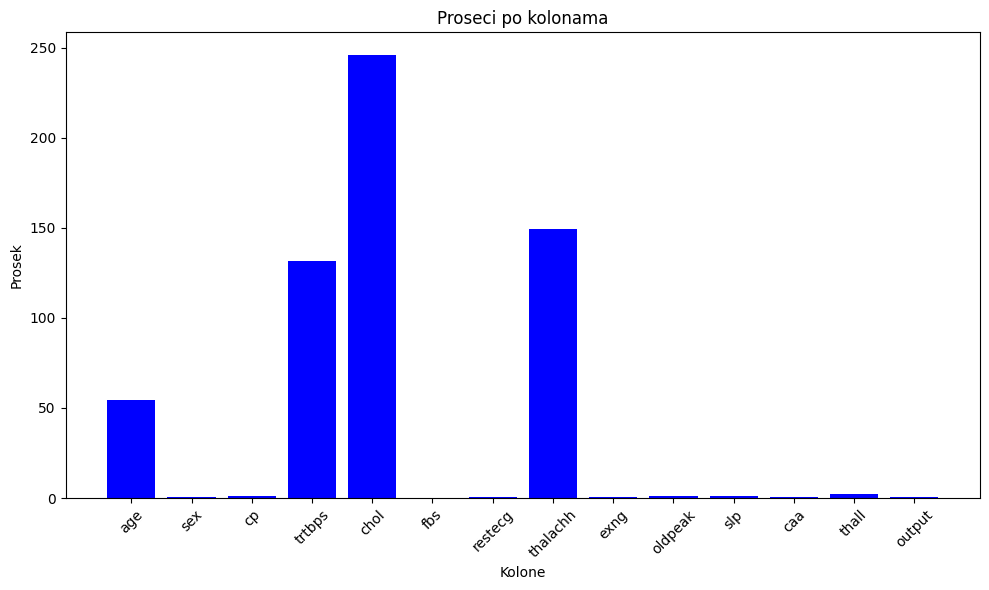

In [6]:
import matplotlib.pyplot as plt

# Vaš dictionary s prosjecima kolona
prosjeci_kolona = {'kolona1': 25, 'kolona2': 35, 'kolona3': 45}

# Pretvorite rječnik u listu za kasnije korištenje
nazivi_kolona = list(dict_prosek.keys())
vrednosti_proseka = list(dict_prosek.values())

# Kreiranje grafikona
plt.figure(figsize=(10, 6))

# Bar grafikon
plt.bar(nazivi_kolona, vrednosti_proseka, color='blue')

# Dodavanje naslova i oznaka osi
plt.title('Proseci po kolonama')
plt.xlabel('Kolone')
plt.ylabel('Prosek')

# Prikaz grafikona
plt.xticks(rotation=45)  # Okrenite oznake x-osi za 45 stupnjeva radi bolje čitljivosti
plt.tight_layout()  # Poboljšava raspored grafikona
plt.show()


kao sto vidite imamo problem da vrednosti nisu skalirane i zato dolazi do nejednakosti podatka to je veoma lose tako da cemo sad odraditi skaliranje pa onda prosek i prikazati graficki

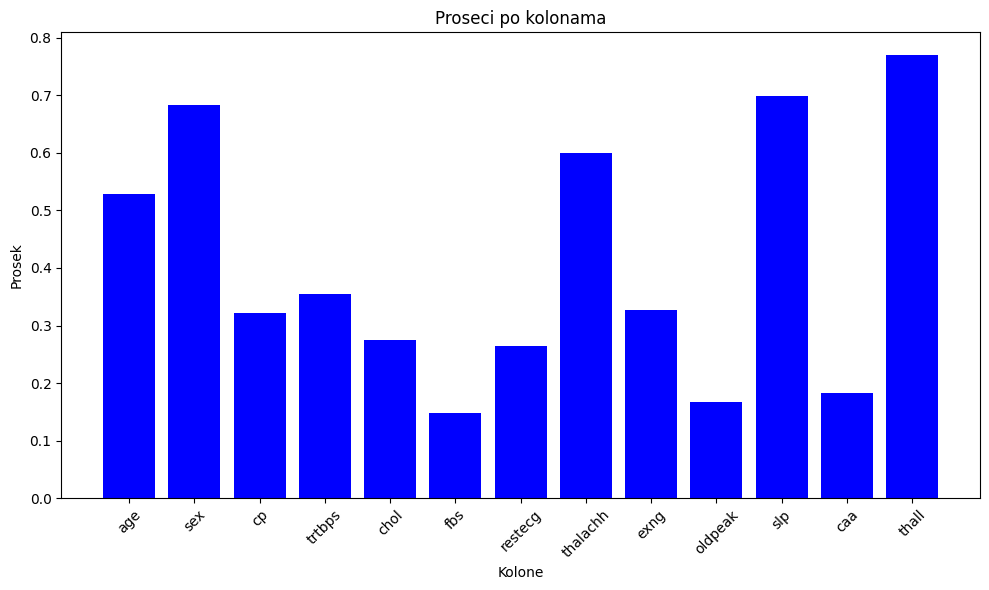

In [11]:
from sklearn.preprocessing import MinMaxScaler
Features = Main_Dataset.drop(columns='output')
Features = pd.DataFrame(Features)
scaler = MinMaxScaler()
Norm_data = scaler.fit_transform(Features)
Norm_df = pd.DataFrame(Norm_data, columns= Features.columns)

dict_prosekNORM = {}

# Petlja kroz sve kolone CSV datoteke
for kolona in Norm_df.columns:
    # Izračunavanje prosjeka za trenutnu kolonu
    prosek_kolone = Norm_df[kolona].mean()
    
    # Dodavanje prosjeka kolone u rječnik s identifikatorom naziva kolone
    dict_prosekNORM[kolona] = prosek_kolone

# Ispis rječnika s prosjecima svake kolone

import matplotlib.pyplot as plt

# Pretvorite rječnik u listu za kasnije korištenje
nazivi_kolona = list(dict_prosekNORM.keys())
vrednosti_proseka = list(dict_prosekNORM.values())

# Kreiranje grafikona
plt.figure(figsize=(10, 6))

# Bar grafikon
plt.bar(nazivi_kolona, vrednosti_proseka, color='blue')

# Dodavanje naslova i oznaka osi
plt.title('Proseci po kolonama')
plt.xlabel('Kolone')
plt.ylabel('Prosek')

# Prikaz grafikona
plt.xticks(rotation=45)  # Okrenite oznake x-osi za 45 stupnjeva radi bolje čitljivosti
plt.tight_layout()  # Poboljšava raspored grafikona
plt.show()

sada kada imamo skalirane podatke mnogo je lepsi uvid u podatke
sada prelazimo na racunanje medijane prvo na normalnim vrednostima onda na skaliranim i na prikaz istih

In [16]:
dict_mediana = {}

# Petlja kroz sve kolone CSV datoteke
for kolona in Main_Dataset.columns:
    # Izračunavanje prosjeka za trenutnu kolonu
    mediana_kolone = Main_Dataset[kolona].median()
    
    # Dodavanje prosjeka kolone u rječnik s identifikatorom naziva kolone
    dict_mediana[kolona] = mediana_kolone

# Ispis rječnika s prosjecima svake kolone
print(dict_mediana)

{'age': 55.0, 'sex': 1.0, 'cp': 1.0, 'trtbps': 130.0, 'chol': 240.0, 'fbs': 0.0, 'restecg': 1.0, 'thalachh': 153.0, 'exng': 0.0, 'oldpeak': 0.8, 'slp': 1.0, 'caa': 0.0, 'thall': 2.0, 'output': 1.0}


sada radimo na skaliranim vrednostima

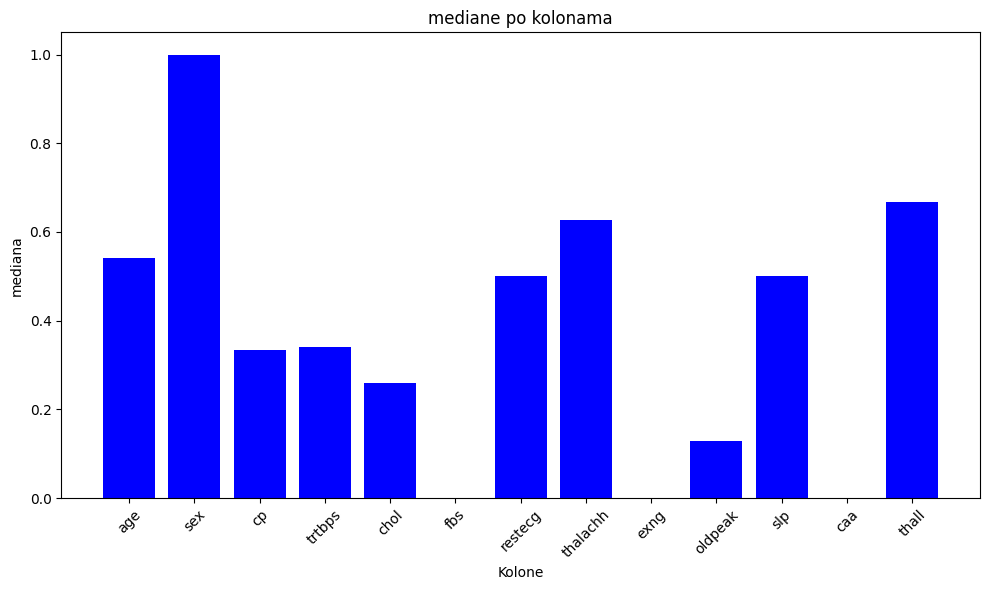

In [15]:
from sklearn.preprocessing import MinMaxScaler
Features = Main_Dataset.drop(columns='output')
Features = pd.DataFrame(Features)
scaler = MinMaxScaler()
Norm_data = scaler.fit_transform(Features)
Norm_df = pd.DataFrame(Norm_data, columns= Features.columns)

dict_medianaNORM = {}

# Petlja kroz sve kolone CSV datoteke
for kolona in Norm_df.columns:
    # Izračunavanje prosjeka za trenutnu kolonu
   mediana_koloneNORM = Norm_df[kolona].median()
    
    # Dodavanje prosjeka kolone u rječnik s identifikatorom naziva kolone
   dict_medianaNORM[kolona] = mediana_koloneNORM

# Ispis rječnika s prosjecima svake kolone

import matplotlib.pyplot as plt

# Pretvorite rječnik u listu za kasnije korištenje
nazivi_kolona = list(dict_medianaNORM.keys())
vrednosti_proseka = list(dict_medianaNORM.values())

# Kreiranje grafikona
plt.figure(figsize=(10, 6))

# Bar grafikon
plt.bar(nazivi_kolona, vrednosti_proseka, color='blue')

# Dodavanje naslova i oznaka osi
plt.title('mediane po kolonama')
plt.xlabel('Kolone')
plt.ylabel('mediana')

# Prikaz grafikona
plt.xticks(rotation=45)  # Okrenite oznake x-osi za 45 stupnjeva radi bolje čitljivosti
plt.tight_layout()  # Poboljšava raspored grafikona
plt.show()

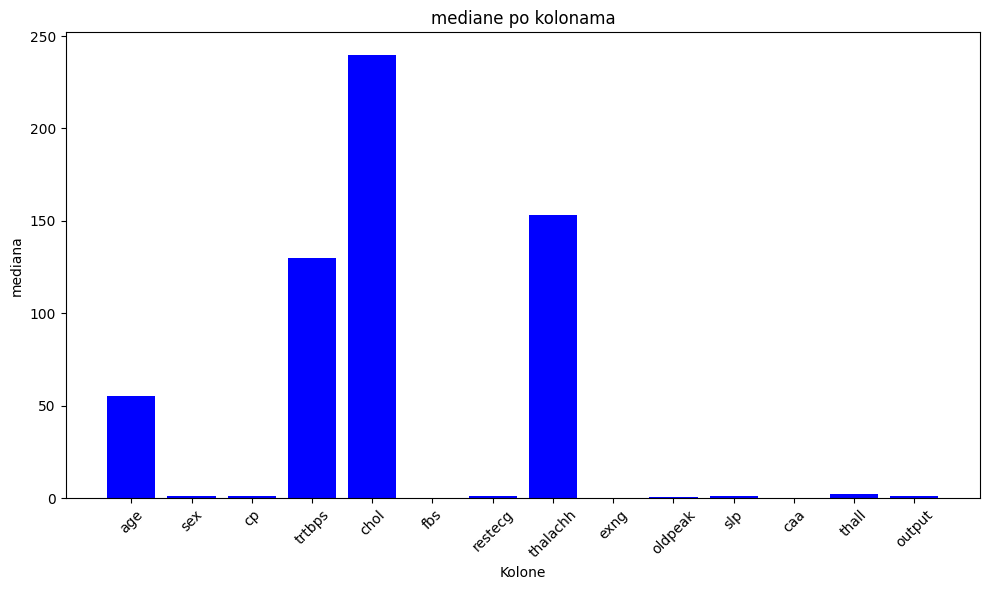

In [17]:
nazivi_kolona = list(dict_mediana.keys())
vrednosti_proseka = list(dict_mediana.values())

# Kreiranje grafikona
plt.figure(figsize=(10, 6))

# Bar grafikon
plt.bar(nazivi_kolona, vrednosti_proseka, color='blue')

# Dodavanje naslova i oznaka osi
plt.title('mediane po kolonama')
plt.xlabel('Kolone')
plt.ylabel('mediana')

# Prikaz grafikona
plt.xticks(rotation=45)  # Okrenite oznake x-osi za 45 stupnjeva radi bolje čitljivosti
plt.tight_layout()  # Poboljšava raspored grafikona
plt.show()

vidimo veliku razliku izmedju obicnih i skaliranih vrednosti kod mediane

sada radimo standardnu devijaciju podataka, radicemo odma na skaliranim podacima
Standardna devijacija: Mera raspršenosti podataka oko srednje vrednosti. Veća vrednost standardne devijacije ukazuje na veću raspršenost podataka.

{'age': 0.18921043728828868, 'sex': 0.46601082333962385, 'cp': 0.3440174964944329, 'trtbps': 0.16545417748601032, 'chol': 0.11833504791764848, 'fbs': 0.35619787492797644, 'restecg': 0.262929798179649, 'thalachh': 0.1748485581291152, 'exng': 0.4697944645223165, 'oldpeak': 0.1872701648497798, 'slp': 0.30811307267298094, 'caa': 0.2556515912423318, 'thall': 0.2040921690927136}


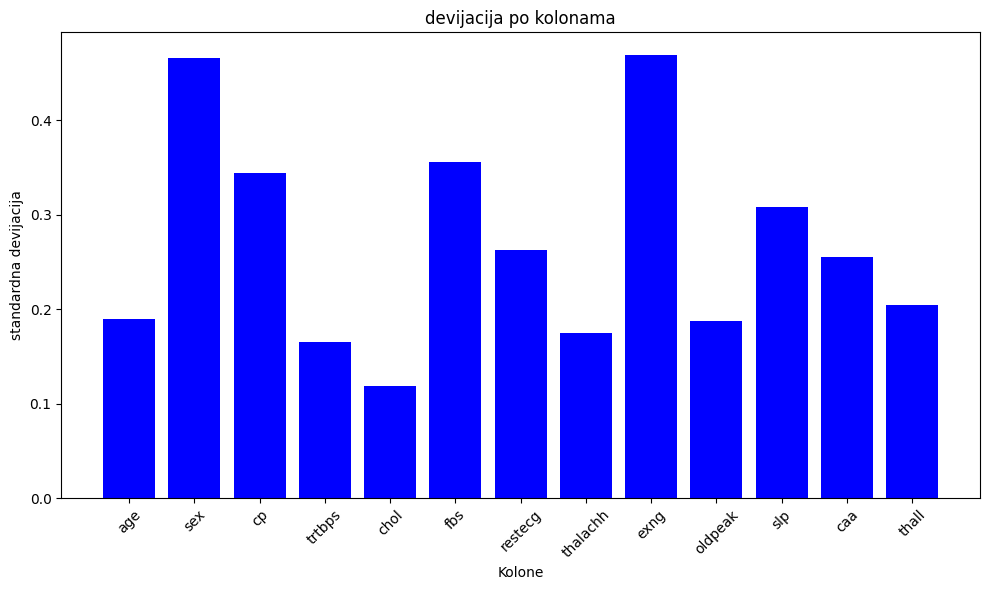

In [22]:
std_dict = {}

for column in Norm_df.columns:
    std_dict[column] = Norm_df[column].std()

# Ispis rječnika s standardnim devijacijama svake kolone
print(std_dict)
nazivi_kolona = list(std_dict.keys())
vrednosti_proseka = list(std_dict.values())

# Kreiranje grafikona
plt.figure(figsize=(10, 6))

# Bar grafikon
plt.bar(nazivi_kolona, vrednosti_proseka, color='blue')

# Dodavanje naslova i oznaka osi
plt.title('devijacija po kolonama')
plt.xlabel('Kolone')
plt.ylabel('standardna devijacija')

# Prikaz grafikona
plt.xticks(rotation=45)  # Okrenite oznake x-osi za 45 stupnjeva radi bolje čitljivosti
plt.tight_layout()  # Poboljšava raspored grafikona
plt.show()

sada radimo Raspon: Razlika između maksimalne i minimalne vrijednosti.

{'age': 0.9999999999999999, 'sex': 1.0, 'cp': 1.0, 'trtbps': 1.0, 'chol': 0.9999999999999998, 'fbs': 1.0, 'restecg': 1.0, 'thalachh': 0.9999999999999999, 'exng': 1.0, 'oldpeak': 1.0, 'slp': 1.0, 'caa': 1.0, 'thall': 1.0}


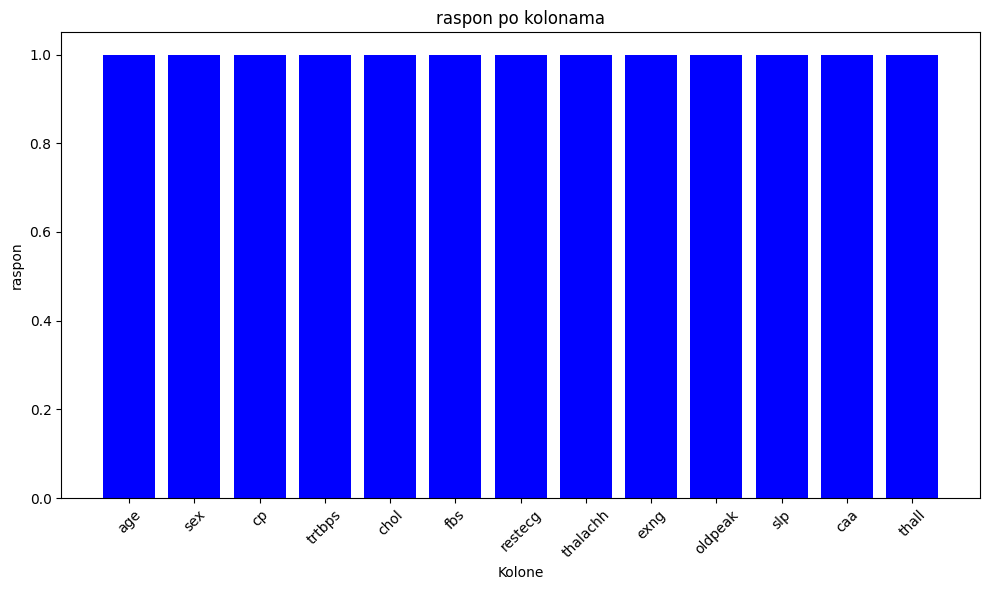

In [21]:
range_dict = {}

for column in Norm_df.columns:
    range_dict[column] = Norm_df[column].max() - Norm_df[column].min()

# Ispis rječnika s rasponima svake kolone
print(range_dict)
nazivi_kolona = list(range_dict.keys())
vrednosti_proseka = list(range_dict.values())

# Kreiranje grafikona
plt.figure(figsize=(10, 6))

# Bar grafikon
plt.bar(nazivi_kolona, vrednosti_proseka, color='blue')

# Dodavanje naslova i oznaka osi
plt.title('raspon po kolonama')
plt.xlabel('Kolone')
plt.ylabel('raspon')

# Prikaz grafikona
plt.xticks(rotation=45)  # Okrenite oznake x-osi za 45 stupnjeva radi bolje čitljivosti
plt.tight_layout()  # Poboljšava raspored grafikona
plt.show()

sada radimo mode odnosno koji broj se najvise ponavlja po kolonama

{'age': 0.6041666666666666, 'sex': 1.0, 'cp': 0.0, 'trtbps': 0.24528301886792458, 'chol': 0.16210045662100453, 'fbs': 0.0, 'restecg': 0.5, 'thalachh': 0.6946564885496184, 'exng': 0.0, 'oldpeak': 0.0, 'slp': 1.0, 'caa': 0.0, 'thall': 0.6666666666666666}


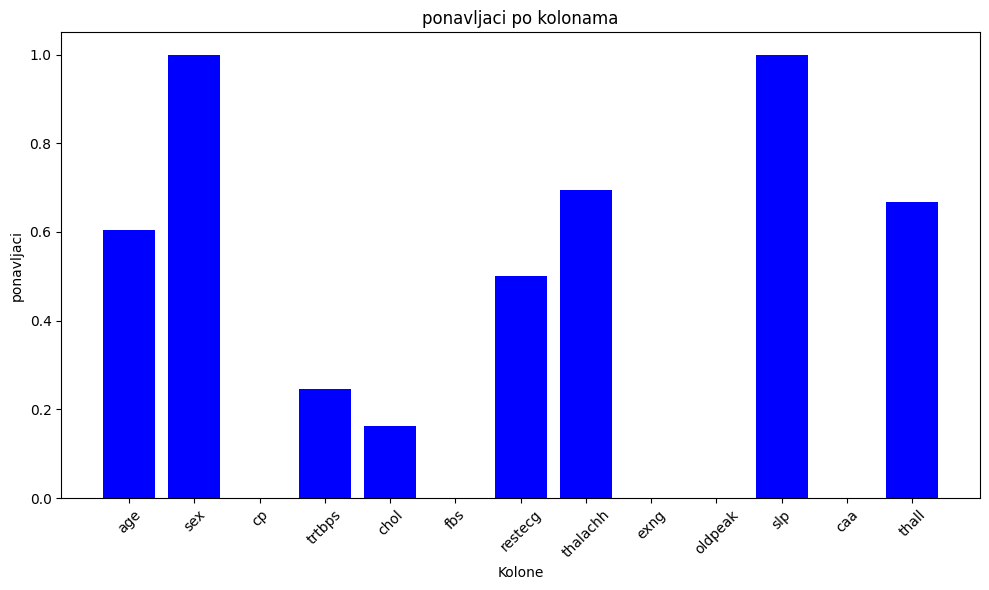

In [25]:
mode_dict = {}

for column in Norm_df.columns:
    mode_dict[column] = Norm_df[column].mode()[0]  # Uzimamo prvi mod ako ih ima više

# Ispis rječnika s modovima svake kolone
print(mode_dict)

nazivi_kolona = list(mode_dict.keys())
vrednosti_proseka = list(mode_dict.values())

# Kreiranje grafikona
plt.figure(figsize=(10, 6))

# Bar grafikon
plt.bar(nazivi_kolona, vrednosti_proseka, color='blue')

# Dodavanje naslova i oznaka osi
plt.title('ponavljaci po kolonama')
plt.xlabel('Kolone')
plt.ylabel('ponavljaci')

# Prikaz grafikona
plt.xticks(rotation=45)  # Okrenite oznake x-osi za 45 stupnjeva radi bolje čitljivosti
plt.tight_layout()  # Poboljšava raspored grafikona
plt.show()

sada cemo raditi varijansa odnosno standardna devijacija na kvadrat

{'age': 0.035800589578825426, 'sex': 0.2171660874696741, 'cp': 0.11834803789429717, 'trtbps': 0.027375084847572204, 'chol': 0.014003183565672163, 'fbs': 0.12687692610320636, 'restecg': 0.06913207877079096, 'thalachh': 0.030572018279830578, 'exng': 0.22070683889581008, 'oldpeak': 0.0350701146428637, 'slp': 0.09493366555198564, 'caa': 0.06535773610473629, 'thall': 0.0416536134849688}


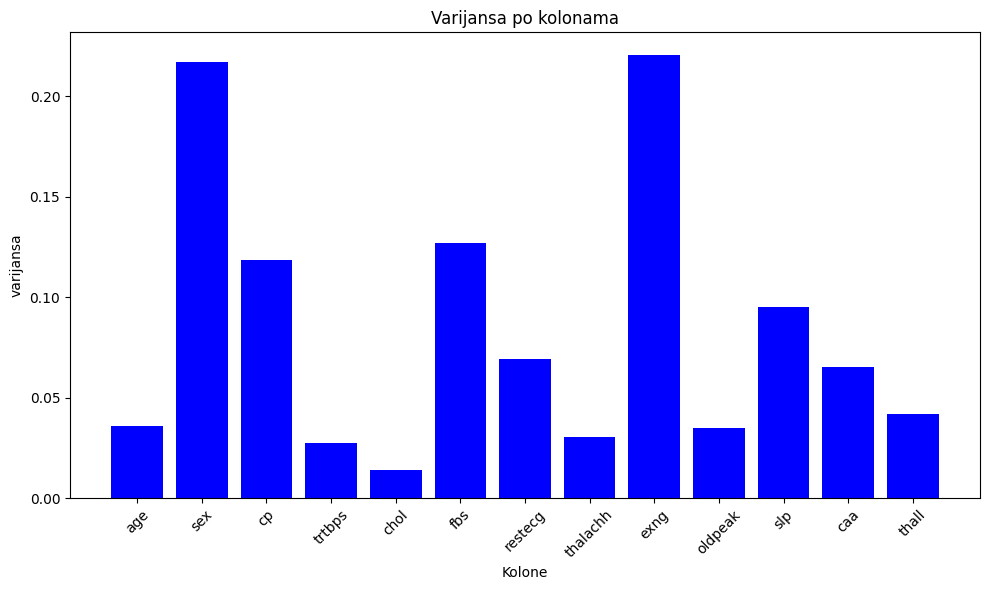

In [27]:
std_dictV = {}

for column in Norm_df.columns:
    std_dictV[column] = Norm_df[column].std() **2

# Ispis rječnika s standardnim devijacijama svake kolone
print(std_dictV)
nazivi_kolona = list(std_dictV.keys())
vrednosti_proseka = list(std_dictV.values())

# Kreiranje grafikona
plt.figure(figsize=(10, 6))

# Bar grafikon
plt.bar(nazivi_kolona, vrednosti_proseka, color='blue')

# Dodavanje naslova i oznaka osi
plt.title('Varijansa po kolonama')
plt.xlabel('Kolone')
plt.ylabel('varijansa')

# Prikaz grafikona
plt.xticks(rotation=45)  # Okrenite oznake x-osi za 45 stupnjeva radi bolje čitljivosti
plt.tight_layout()  # Poboljšava raspored grafikona
plt.show()